The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.It is one of the most famous datasets in machine learning. It contains measurements of 150 iris flowers from three different species:

1.Iris Setosa

2.Iris Versicolor

3.Iris Virginica

For each flower, we have 4 numerical features:

1.Sepal length (cm)

2.Sepal width (cm)

3.Petal length (cm)

4.Petal width (cm)

The goal is to build a classification model that can predict the species of an iris flower based on its features.

In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Data Loading and Visualisation 

In [10]:
# Import the necessary library first
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)

df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Dataset info
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


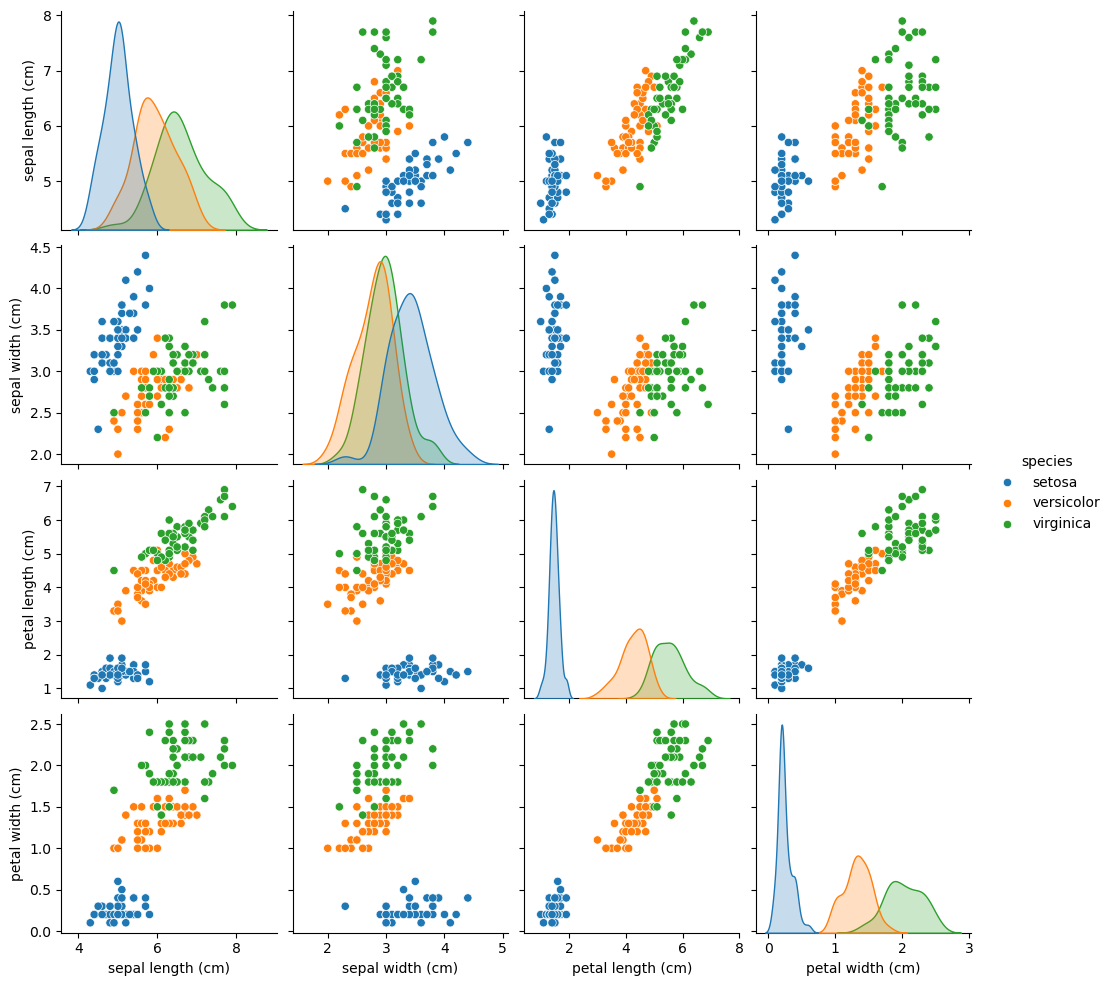

In [5]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot visualization
sns.pairplot(df, hue="species")
plt.show()

Question 1

From the scatterplot/pairplot above which two features seem most useful for separating species?

Ans: The given scatterplot/ pair plot shows that the petal length and the petal width are the most useful features for separating the 4 species of Iris. 

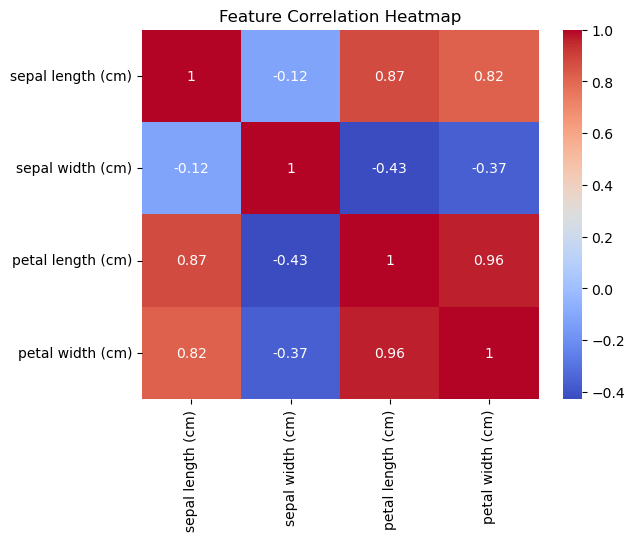

In [6]:
#Heat Map Visualisation
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Question 2

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

Ans: The correlation heatmap suggests that petal length and petal width are the pair of features most correlated, meaning they tend to grow together. As petal length grows, the width of the petal grows along with it. 

Train/Test Split

In [9]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 105
Test samples: 45


Question 3.

Why do we split the dataset into training and testing sets?

Ans:The primary need for a train-test split in machine learning is to prevent overfitting and accurately evaluate a model's performance on new, unseen data. Using the training set, we can teach a model the relationship between features (inputs) and target labels (outputs) while adjusting model parameters such that it fits the data. On the other hand, we use the testing model to check how the model is performing using new, unseen data. The training sets measure accuracy, recall, etc.

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



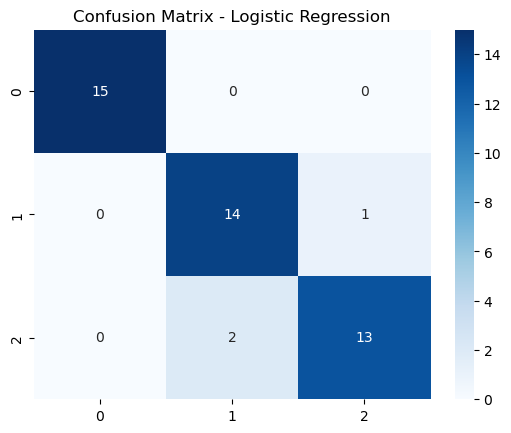

In [13]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Question 4.

Logistic Regression assumes a linear decision boundary. why?

Ans: Logistic Regression assumes a linear decision boundary because it inherently models the log-odds of a classification as a linear combination of the input features. While the final output uses a non-linear function to produce probabilities, the core decision process is based on this linear relationship, where points on one side of the hyperplane belong to one class and points on the other side belong to the other class.  

Question 5.

Do you think this assumption holds for the Iris dataset? Why or why not?

Ans: The Logistic Regression algorithm assumes a linear boundary for classification, including when applied to the Iris dataset, because it models the probability of a class using a linear combination of features, which results in a linear decision boundary (a hyperplane) for classifying the data. While this means the decision boundary itself is linear, it is important to note that the overall model is non-linear due to the use of the sigmoid (logistic) function.

Accuracy (Random Forest): 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



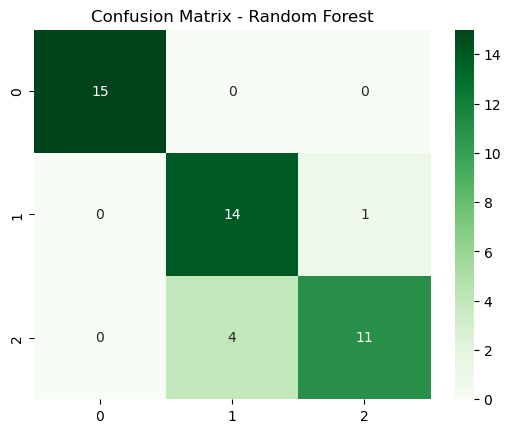

In [16]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

Question 6.

If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

Ans: A higher number of trees typically leads to a more robust and stable model. By averaging the predictions of a larger ensemble of diverse decision trees, the model's overall variance is reduced, which often translates to improved accuracy and better generalization to unseen data. While increasing n_estimators initially improves performance, there comes a point where adding more trees yields only marginal gains in accuracy. The performance curve tends to flatten out after a certain number of trees, and further increases may not significantly impact the model's predictive power.

Question 7.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

Ans: Random Forest typically outperforms Logistic Regression in predictive power for most complex datasets because it can capture non-linear relationships and handle high-dimensional, noisy, and unbalanced data better, whereas Logistic Regression is simpler, faster, and provides better interpretability but is limited to linear decision boundaries. However, Logistic Regression model peformed btter in case of the Iris dataset. The best model ultimately depends on the specific dataset and the priority between accuracy and interpretability

Question 8.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

Ans: With a much larger dataset containing noisy features, Random Forest would generally be expected to generalize better than Logistic Regression. This is because Random Forest is an ensemble of many decision trees, and averaging their predictions helps smooth out noise and reduce variance. It can capture complex, nonlinear relationships that a linear model like Logistic Regression might miss, especially when the data is not perfectly separable by a straight line. Logistic Regression could still work if strong regularization is applied, but in most cases, Random Forest is more robust to noisy data and better suited for large, complex datasets